# Flipkart Product reviews with sentiment Analysis using NLP

# Import the packages

In [2]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Data Collection

In [5]:
df = pd.read_csv(r"C:\Users\NAN RAJA\Downloads\archive (48).zip")

In [7]:
df

,product_name,product_price,Rate,Review,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral
...,...,...,...,...,...,...
205047,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,must buy!,good product,positive
205048,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,super!,nice,positive
205049,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,3,nice,very nice and fast delivery,positive
205050,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,just wow!,awesome product,positive


# Data Understanding

In [10]:
df.head()

,product_name,product_price,Rate,Review,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral


In [12]:
df.tail()

,product_name,product_price,Rate,Review,Summary,Sentiment
205047,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,must buy!,good product,positive
205048,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,super!,nice,positive
205049,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,3,nice,very nice and fast delivery,positive
205050,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,just wow!,awesome product,positive
205051,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,4,value-for-money,very good but mixing bowl not included is one ...,neutral


In [14]:
df.dtypes

product_name     object
product_price    object
Rate             object
Review           object
Summary          object
Sentiment        object
dtype: object

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205052 entries, 0 to 205051
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   product_name   205052 non-null  object
 1   product_price  205052 non-null  object
 2   Rate           205052 non-null  object
 3   Review         180388 non-null  object
 4   Summary        205041 non-null  object
 5   Sentiment      205052 non-null  object
dtypes: object(6)
memory usage: 9.4+ MB


In [18]:
df.nunique()

product_name       958
product_price      525
Rate                 8
Review            1324
Summary          92923
Sentiment            3
dtype: int64

In [20]:
df.isnull().sum()

product_name         0
product_price        0
Rate                 0
Review           24664
Summary             11
Sentiment            0
dtype: int64

# Data Cleaning()

In [23]:
df.dropna(inplace=True)

In [25]:
df.isnull().sum()

product_name     0
product_price    0
Rate             0
Review           0
Summary          0
Sentiment        0
dtype: int64

In [27]:
df["Summary"].value_counts().sum()

180379

In [29]:
df["Sentiment"].value_counts().sum()

180379

In [33]:
df["Sentiment"].value_counts()

Sentiment
positive    147171
negative     24401
neutral       8807
Name: count, dtype: int64

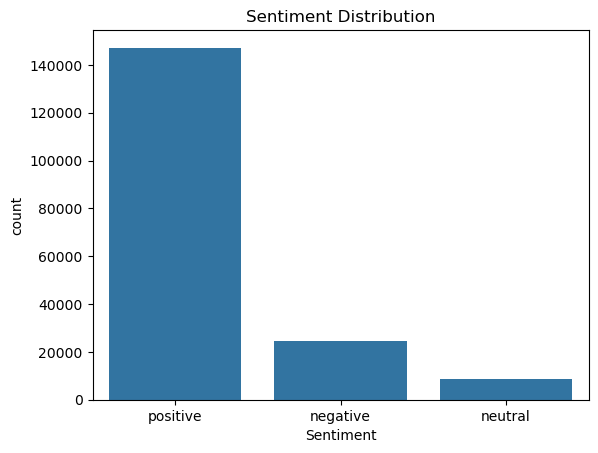

In [35]:
sns.countplot(data=df, x='Sentiment')
plt.title('Sentiment Distribution')
plt.show()

# Preparing for NLtk Preprocessing

In [38]:
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to C:\Users\NAN
[nltk_data]     RAJA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\NAN
[nltk_data]     RAJA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [39]:
nltk.download('stopwords') # downloading the stop words that are being used
nltk.download('wordnet') # Downloading lexical database for lemmatization
nltk.download('omw-1.4') # Downloads Open Multilingual WordNet for supporting wordnet
nltk.download('punkt_tab') # Downloads Punkt tokenizer for tokenizing

[nltk_data] Downloading package stopwords to C:\Users\NAN
[nltk_data]     RAJA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\NAN
[nltk_data]     RAJA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\NAN
[nltk_data]     RAJA\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\NAN
[nltk_data]     RAJA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [42]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\NAN
[nltk_data]     RAJA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [44]:
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

# NLP

In [47]:
preprocessed_data = []
def preprocess_data(input, preprocessed_data):
  for text in input:
    lowered = text.lower()
    translator = str.maketrans('', '', string.punctuation)
    cleaned_text = lowered.translate(translator)
    tokenized = nltk.word_tokenize(cleaned_text)
    stop_words_removed = [word for word in tokenized if word not in stop_words]
    stemmed = [stemmer.stem(word) for word in stop_words_removed]
    preprocessed_data.append(' '.join(stemmed))

# Preprocessing the text data

In [54]:
input = df["Summary"]
labels = df["Sentiment"]

In [56]:
input

0         great cooler excellent air flow and for this p...
1                     best budget 2 fit cooler nice cooling
2         the quality is good but the power of air is de...
3                         very bad product its a only a fan
4                                             ok ok product
                                ...                        
205047                                         good product
205048                                                 nice
205049                          very nice and fast delivery
205050                                      awesome product
205051    very good but mixing bowl not included is one ...
Name: Summary, Length: 180379, dtype: object

In [58]:
labels

0         positive
1         positive
2         positive
3         negative
4          neutral
            ...   
205047    positive
205048    positive
205049    positive
205050    positive
205051     neutral
Name: Sentiment, Length: 180379, dtype: object

In [60]:
preprocess_data

<function __main__.preprocess_data(input, preprocessed_data)>

In [62]:
preprocess_data(input, preprocessed_data)

In [64]:
preprocessed_data[0]

'great cooler excel air flow price amaz unbelievablejust love'

In [66]:
input[0]

'great cooler excellent air flow and for this price its so amazing and unbelievablejust love it'

# Splitting the data

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# MultinomialNB - suitable for discrete data(eg: word counts in text)

In [71]:
print(len(preprocessed_data), len(labels))

180379 180379


In [73]:
X_train,X_test, y_train,y_test = train_test_split(preprocessed_data, labels, test_size=0.2, random_state=42)

In [75]:
vectorizer = CountVectorizer()

In [77]:
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Building the model

In [80]:
model = MultinomialNB()

model

In [83]:
model.fit(X_train_vec,y_train)

MultinomialNB()

# Model Evaluation¶

In [86]:
y_pred = model.predict(X_test_vec)

In [88]:
accuracy_score(y_test,y_pred)

0.8951103226521787

# Predicting for new input


In [91]:
import numpy as np

In [118]:
input = np.array(['everybody say the product is good, amazing and awesome but i feel the product is bad wont recommend'])

In [120]:
new_preprocessed = []
preprocess_data(input, new_preprocessed)

In [122]:
new_preprocessed 

['everybodi say product good amaz awesom feel product bad wont recommend']

In [124]:
user_input_vec = vectorizer.transform(new_preprocessed)

In [126]:
user_input_vec

<1x34173 sparse matrix of type '<class 'numpy.int64'>'
	with 10 stored elements in Compressed Sparse Row format>

In [128]:
model.predict(user_input_vec)

array(['positive'], dtype='<U8')

# Saving the model

In [106]:
import pickle

In [108]:
with open('model.pkl', 'wb') as file:
  pickle.dump(model, file)

In [110]:
with open('vectorizer.pkl', 'wb') as file:
  pickle.dump(vectorizer, file)

# Loading the model

In [113]:
with open('model.pkl', 'rb') as file:
  loaded_model = pickle.load(file)

In [115]:
loaded_model.predict(user_input_vec)

array(['negative'], dtype='<U8')